# 泰坦尼克号数据集分析报告

从[kaggle]('https://www.kaggle.com/c/titanic/data')网站上我们得到一组数据集，包括泰坦尼克号上2224名乘客和船员中891名的人口学数据和乘客基本信息。

从该数据集中，我们可以看到以下类别的信息：
* PassengerID => 乘客ID
* Durvived => 是否生还
* Pclass => 乘客的仓位，即社会经济身份地位(1/2/3等)
* Name => 姓名
* Sex => 性别
* Age => 年龄
* SibSP => 同行兄弟／姐妹／配偶个数
* Parch => 同行父母／儿女个数
* Ticket => 票号
* Fare => 票价
* Cabin => 客舱号
* Embarked => 登船港口

## 提出的问题

此报告将就该数据集展开分析，研究有哪些因素影响乘客们的生还率。
1. 性别对生还率的影响
2. 年龄对生还率的影响
3. 地位对生还率的影响
4. 同行亲人数量对生还率的影响
5. 登船港口对生还率的影响

此处，生还率是因变量，乘客的性别、年龄、地位、同行亲人人数以及登船港口为自变量。

## 数据初探

### 1、获取数据

In [1]:
import unicodecsv
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)

### 2、探索数据

In [2]:
# 查看前几行数据以了解具体信息
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 获取数据集摘要信息
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


从摘要信息中可以看出，乘客生还率为38.38%左右，有年龄信息的乘客平均年龄为29岁左右，超过50%的乘客在3等仓，很少一部分乘客结伴登船，大多为独自一人。

In [4]:
# 查看每个字段的统计信息
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


由此信息可以看到，乘客的年龄、仓位号和登船港口信息不全。

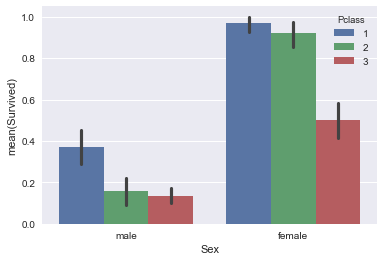

In [5]:
# 就三个明显因素对数据进行初步探索
sns.barplot(x="Sex", y="Survived", hue="Pclass",data = titanic_df)

从图中可以看到女性的平均生还率要高于男性，且仓位越高平均生还率越高。

## 数据处理

In [6]:
# 修正没有年龄的数据
average_age_of_passengers = titanic_df['Age'].mean()
titanic_df['Age'].fillna(average_age_of_passengers,inplace=True)
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 根据年龄进行分组
def person_type(dataSet):
    age, sex = dataSet
    
    if age < 18:
        return 'child'
    elif age > 60:
        return 'elder'
    else:
        return 'adult'
    
titanic_df['Type']=titanic_df[['Age','Sex']].apply(person_type, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult


In [8]:
#提取生还的乘客数据
survived_df = titanic_df[titanic_df['Survived'] == 1]
survived_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.549778,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,13.772498,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,29.699118,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [55]:
#合并同行亲友人数
def company(dataSet):
    sibsp, parch = dataSet
    return sibsp+parch

titanic_df['Company']=titanic_df[['SibSp','Parch']].apply(company, axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Type,Company
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0


## 探索数据

下面将进行对年龄、性别、地位、同行人数和登船港口对生还率的影响进行探究

### 1、探究年龄对生还率的影响

In [9]:
titanic_df.groupby('Survived').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.415100,12.457370,1.00,23.0,29.699118,35.0,74.0
1,342.0,28.549778,13.772498,0.42,21.0,29.699118,35.0,80.0


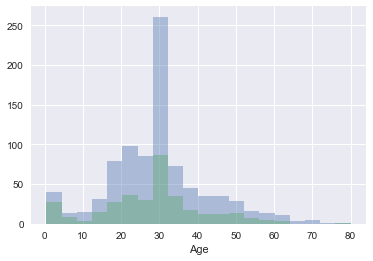

In [10]:
#生还与否的各年龄人数分布
from scipy.stats import norm
sns.distplot(titanic_df['Age'],bins = 20,kde=False,norm_hist=None)
sns.distplot(survived_df['Age'],bins = 20,kde=False,norm_hist=None)

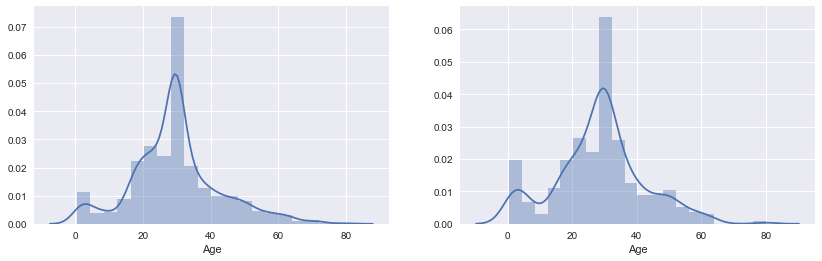

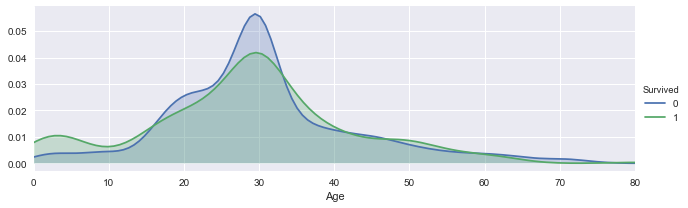

In [33]:
#生还与否的各年龄分布
f, axes = plt.subplots(1,2,figsize=(14, 4))
sns.distplot(titanic_df['Age'],bins = 20,kde=True, ax=axes[0])
sns.distplot(survived_df['Age'],bins = 20,kde=True,ax=axes[1])

fig = sns.FacetGrid(titanic_df, hue='Survived', aspect=3) 
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

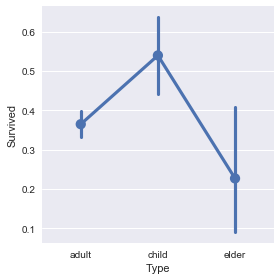

In [12]:
#不同年龄类型乘客的生还率
sns.factorplot('Type','Survived',data=titanic_df)

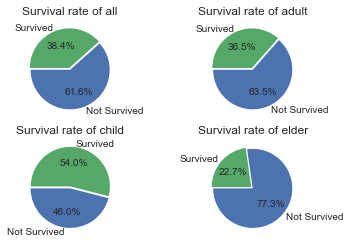

In [13]:
from matplotlib.gridspec import GridSpec
labels = 'Not Survived', 'Survived'
explode = (0, 0.05)

the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
fracs = [len(titanic_df[titanic_df['Survived'] == 0]),len(titanic_df[titanic_df['Survived'] == 1])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of all") 

plt.subplot(the_grid[0, 1], aspect=1)
fracs = [len(titanic_df[titanic_df['Type'] == 'adult'])-len(survived_df[survived_df['Type'] == 'adult']),len(survived_df[survived_df['Type'] == 'adult'])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of adult") 

plt.subplot(the_grid[1, 0], aspect=1)
fracs = [len(titanic_df[titanic_df['Type'] == 'child'])-len(survived_df[survived_df['Type'] == 'child']),len(survived_df[survived_df['Type'] == 'child'])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of child") 

plt.subplot(the_grid[1, 1], aspect=1)
fracs = [len(titanic_df[titanic_df['Type'] == 'elder'])-len(survived_df[survived_df['Type'] == 'elder']),len(survived_df[survived_df['Type'] == 'elder'])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of elder") 

可见：
1. 生还者的平均年龄为28.54岁
2. 小孩生还率最高，其次是成人，老年人生还率最低

### 2、性别对生还率的影响

下面结合年龄来看看性别对生还率的影响

In [14]:
titanic_df.groupby('Sex').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [35]:
survived_df.groupby('Sex').describe()['Age']

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,233.0,28.979263,13.032597,0.75,22.0,29.699118,35.0,63.0
male,109.0,27.631705,15.257584,0.42,20.0,29.699118,35.0,80.0


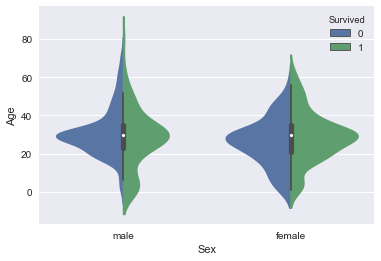

In [23]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=titanic_df, split=True)

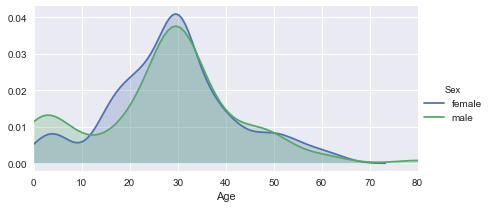

In [32]:
#幸存的乘客性别年龄分布
fig = sns.FacetGrid(survived_df, hue='Sex', aspect=2) 
fig.map(sns.kdeplot, 'Age', shade=True)
fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

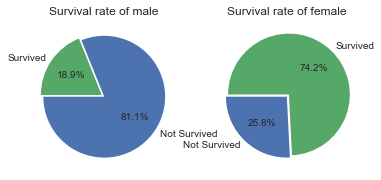

In [30]:
labels = 'Not Survived', 'Survived'
explode = (0, 0.05)

the_grid = GridSpec(1, 2)
plt.subplot(the_grid[0, 0], aspect=1)

fracs = [len(titanic_df[titanic_df['Sex'] == 'male'])-len(survived_df[survived_df['Sex'] == 'male']),len(survived_df[survived_df['Sex'] == 'male'])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of male") 

plt.subplot(the_grid[0, 1], aspect=1)
fracs = [len(titanic_df[titanic_df['Sex'] == 'female'])-len(survived_df[survived_df['Sex'] == 'female']),len(survived_df[survived_df['Sex'] == 'female'])]
plt.pie(fracs, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False,startangle=180)
plt.title("Survival rate of female") 

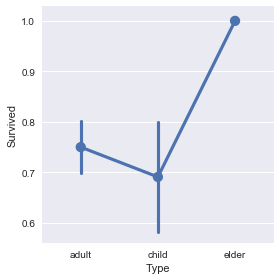

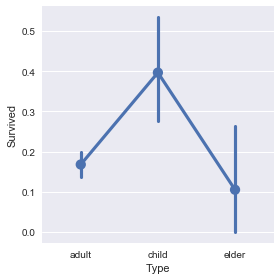

In [46]:
#不同性别情况下不同年龄类型的生还率
female_df = titanic_df[titanic_df['Sex'] == 'female']
sns.factorplot('Type','Survived',data=female_df)
male_df = titanic_df[titanic_df['Sex'] == 'male']
sns.factorplot('Type','Survived',data=male_df)

可见：
1. 女性生还者平均年龄为28.98岁，男性生还者平均年龄为27.63岁
2. 女性生还率比男性高出很多
3. 男性成年人和老年人的生还率最低

### 3、地位对生还率的影响

In [50]:
titanic_df.groupby('Pclass').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


### 4、同行亲人人数对生还率的影响

In [57]:
titanic_df.groupby('Company').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
0,537.0,0.303538,0.460214,0.0,0.0,0.0,1.0,1.0
1,161.0,0.552795,0.498756,0.0,0.0,1.0,1.0,1.0
2,102.0,0.578431,0.496249,0.0,0.0,1.0,1.0,1.0
3,29.0,0.724138,0.454859,0.0,0.0,1.0,1.0,1.0
4,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
5,22.0,0.136364,0.351250,0.0,0.0,0.0,0.0,1.0
6,12.0,0.333333,0.492366,0.0,0.0,0.0,1.0,1.0
7,6.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,7.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### 5、登船港口对生还率的影响

In [59]:
titanic_df.groupby('Embarked').describe()['Survived']

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,0.553571,0.498608,0.0,0.0,1.0,1.0,1.0
Q,77.0,0.389610,0.490860,0.0,0.0,0.0,1.0,1.0
S,644.0,0.336957,0.473037,0.0,0.0,0.0,1.0,1.0


# 结论

    由以上信息和图表可初步得出以下结论：

    但由于这只是整体数据集中的一部分，

***
参考资料  
[1]. [数据分析 - 泰坦尼克号生还分析](http://www.cnblogs.com/msdynax/p/6099814.html)  
[2]. [ilanosm/TitanicDataset](https://github.com/ilanosm/TitanicDataset/blob/master/Titanic_Dataset.ipynb)